# K-means

## Load data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv("World Happiness Report_2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
variables = df.iloc[:,[2,3,4,5,6,7]]

## PCA y Kmeans

In [11]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2) #Elegimos dos componentes principales, para bajar de dimensión 4 a 2 y poder graficar
pca = pca.fit_transform(variables) #Ajustar el modelo con nuestros datos y aplicar la reducción de la dimensión a 2D

In [41]:
pca.shape

(156, 2)

## K óptimo

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

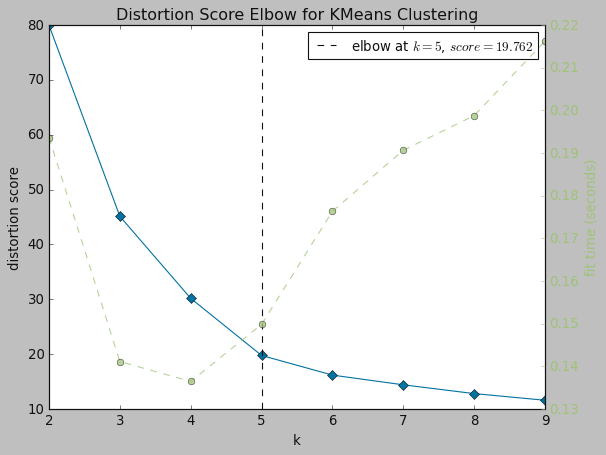

/home/lx97/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5a0307b80>,
                 k=None, model=None)

In [43]:
kelbow_visualizer(KMeans(random_state=4), pca, k=(2,10))

## K means

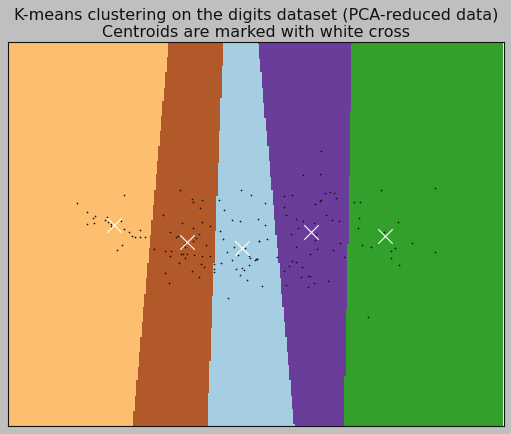

In [44]:
import matplotlib.pyplot as plt

reduced_data = pca
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
kmeans.cluster_centers_

array([[-0.81261012, -0.05884229],
       [ 2.03052388,  0.01797886],
       [-1.9004735 ,  0.11509504],
       [ 0.95170418,  0.05331802],
       [-0.00501885, -0.07781134]])

In [22]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Voy a ponerle las etiquetas del kmeans con PCA a el DF original, esto con el objetivo de analizar los grupos

In [25]:
label = list(kmeans.labels_)
df = df.assign(Cluster_group = label)
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster_group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2


In [27]:
cluster_1 = df[df['Cluster_group'] == 0]
cluster_1.mean()

Overall rank                    42.750000
Score                            6.135975
GDP per capita                   1.167950
Social support                   1.397900
Healthy life expectancy          0.884625
Freedom to make life choices     0.440200
Generosity                       0.150550
Perceptions of corruption        0.088200
Cluster_group                    0.000000
dtype: float64

In [28]:
cluster_2 = df[df['Cluster_group'] == 1]
cluster_2.mean()

Overall rank                    147.941176
Score                             3.543941
GDP per capita                    0.339706
Social support                    0.736412
Healthy life expectancy           0.420765
Freedom to make life choices      0.245882
Generosity                        0.204529
Perceptions of corruption         0.107353
Cluster_group                     1.000000
dtype: float64

In [29]:
cluster_3 = df[df['Cluster_group'] == 2]
cluster_3.mean()

Overall rank                    11.500000
Score                            7.202773
GDP per capita                   1.373955
Social support                   1.508364
Healthy life expectancy          0.991045
Freedom to make life choices     0.536591
Generosity                       0.259182
Perceptions of corruption        0.251409
Cluster_group                    2.000000
dtype: float64

In [30]:
cluster_4 = df[df['Cluster_group'] == 3]
cluster_4.mean()

Overall rank                    118.404762
Score                             4.547476
GDP per capita                    0.609405
Social support                    1.009333
Healthy life expectancy           0.520381
Freedom to make life choices      0.350238
Generosity                        0.185714
Perceptions of corruption         0.087690
Cluster_group                     3.000000
dtype: float64

In [31]:
cluster_5 = df[df['Cluster_group'] == 4]
cluster_5.mean()

Overall rank                    79.857143
Score                            5.381886
GDP per capita                   0.939657
Social support                   1.273257
Healthy life expectancy          0.769743
Freedom to make life choices     0.369657
Generosity                       0.166714
Perceptions of corruption        0.076771
Cluster_group                    4.000000
dtype: float64

In [33]:
from mpl_toolkits.mplot3d import Axes3D

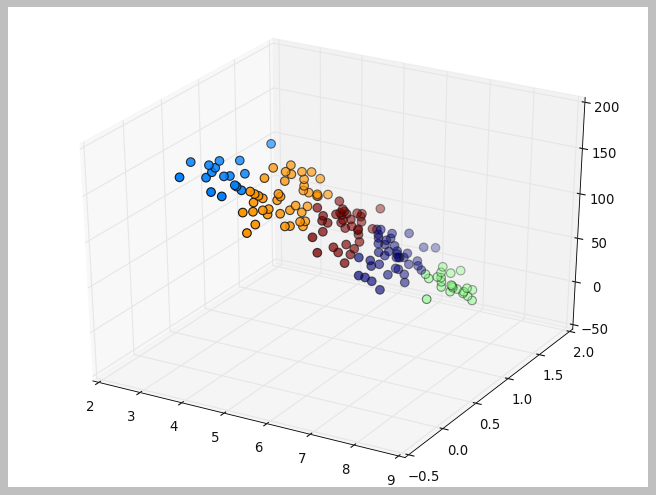

In [53]:
#graficamos las 3 dimensiones mas importantes del dataset original

X = np.array(df[['Score','GDP per capita','Overall rank','Generosity']])
labels=np.array(df['Cluster_group'])
plt.style.use('classic')

y = np.array(df['Score'])

fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels,s=60)



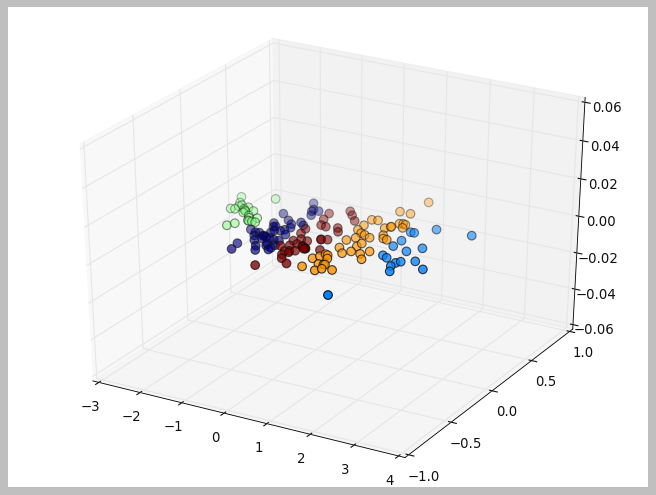

In [52]:
#graficamos el resultado de k-means con PCA

X = pca
labels=np.array(df['Cluster_group'])
plt.style.use('classic')

y = np.array(df['Score'])

fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=labels,s=60)

